In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, BatchNormalization, Dropout, Flatten, GlobalMaxPooling1D, GRU, Attention, GlobalAveragePooling1D
from tensorflow.compat.v1.keras import backend as K
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [3]:
# Load your CSV data
data = pd.read_csv('/content/gdrive/MyDrive/Capstone/dataset - Kualifikasi.csv')

In [4]:
data.describe()

,Job Position,Office,City,Country,Salary,Work Time,Job Level,Job Level Specific,Job_Category,Industry,Qualification 1,Qualification 2,Qualification 3,Qualification 4,Qualification 5,Unnamed: 15
count,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1123,1107,1078,992,3
unique,1039,242,64,6,214,7,7,5,23,117,882,928,916,884,818,3
top,Account Executive,Aces Call Center Jobs Inc.,Singapore,Indonesia,Salary Undisclosed,Full Time,Entry Level,"Junior, Apprentice",Sales and Marketing,Financial Services,Filipino,"Minimum D3/S1 in all majors, preferably Econom...",Minimum 1-3 years experience as marketing offi...,Have experience as a leader/supervisor min. 2 ...,Have a private vehicle and an active SIM C,Attractive
freq,8,101,172,686,759,1028,630,630,308,166,33,13,13,13,14,1


In [5]:
data.head()

,Job Position,Office,City,Country,Salary,Work Time,Job Level,Job Level Specific,Job_Category,Industry,Qualification 1,Qualification 2,Qualification 3,Qualification 4,Qualification 5,Unnamed: 15
0,.NET Developer,NTT INDONESIA TECHNOLOGY,Jakarta Pusat,Indonesia,Salary Undisclosed,Full Time,Associate,Supervisor,IT and Software,Information Technology / IT,Bachelor degree majoring in computer science /...,Candidate should have minimum 3 years experien...,Strong hands on experience in Microsoft .NET p...,Experience in ASP.NET component KendoUI/Devexp...,Experience in database scripting SQL Server / ...,NaN
1,.Net Senior API developer,Gluon Consulting Pte. Ltd.,Jakarta Pusat,Indonesia,"IDR 23,158,053.49 - IDR 38,596,755.82",Full Time (Remote),Mid-Senior Level,Manager,IT and Software,IT and Software,At least 5 years of software development exper...,Knowledge of the ASP.NET Core API development ...,Proven experience building REST API using esta...,Experience with at least two of: relational da...,"Experience with unit testing, containerization...",NaN
2,[BANDAR JAYA] Microfinancing Sales Section Head,FIFGROUP,Bandar Lampung,Indonesia,Salary Undisclosed,Full Time,Associate,Supervisor,Sales and Marketing,Financial Services,Max age. 32 years,"Minimum D3/S1 in all majors, preferably Econom...",Minimum 1-3 years experience as marketing offi...,Have experience as a leader/supervisor min. 2 ...,Having experience in the field of micro financ...,NaN
3,[CAKUNG] Microfinancing Sales Section Head,FIFGROUP,Jakarta Timur,Indonesia,Salary Undisclosed,Full Time,Associate,Supervisor,Sales and Marketing,Financial Services,Max age. 32 years,"Minimum D3/S1 in all majors, preferably Econom...",Minimum 1-3 years experience as marketing offi...,Have experience as a leader/supervisor min. 2 ...,Having experience in the field of micro financ...,NaN
4,[HCM] Growth Marketing Manager,Timo Digital Bank,"Thành phố Hồ Chí Minh,",Vietnam,Salary Undisclosed,Full Time,Mid-Senior Level,Manager,Sales and Marketing,Banking,High logical thinking: seeing the nature of a ...,Deep understanding of human psychology and an ...,Creative and pragmatic at the same time: how t...,You will work in a healthy working environment...,You will also have extremely smart and interes...,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Position        1124 non-null   object
 1   Office              1124 non-null   object
 2   City                1124 non-null   object
 3   Country             1124 non-null   object
 4   Salary              1124 non-null   object
 5   Work Time           1124 non-null   object
 6   Job Level           1124 non-null   object
 7   Job Level Specific  1124 non-null   object
 8   Job_Category        1124 non-null   object
 9   Industry            1124 non-null   object
 10  Qualification 1     1124 non-null   object
 11  Qualification 2     1123 non-null   object
 12  Qualification 3     1107 non-null   object
 13  Qualification 4     1078 non-null   object
 14  Qualification 5     992 non-null    object
 15  Unnamed: 15         3 non-null      object
dtypes: object(16)
memory usa

In [7]:
missing_data = data.isnull()
total_missing = missing_data.sum()
print(total_missing)

Job Position             0
Office                   0
City                     0
Country                  0
Salary                   0
Work Time                0
Job Level                0
Job Level Specific       0
Job_Category             0
Industry                 0
Qualification 1          0
Qualification 2          1
Qualification 3         17
Qualification 4         46
Qualification 5        132
Unnamed: 15           1121
dtype: int64


This code snippet utilizes TensorFlow and Keras in Google Colab to perform text classification. It preprocesses 'Job Position' labels, builds a neural network model with an embedding layer, compiles the model for categorical classification, and trains it on the specified dataset, storing the training history in history_classification.

In [8]:
# Assuming 'Job Position' is the column you are interested in
labels = data['Job Position']

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(labels)

x_seq = tokenizer.texts_to_sequences(labels)
x_pad = pad_sequences(x_seq, maxlen=max_len)

# Convert labels to numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert numerical labels to one-hot encoding
one_hot_labels = to_categorical(encoded_labels)

# Build the NLP model for classification
num_classes = len(label_encoder.classes_)
model_classification = Sequential()
model_classification.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model_classification.add(Dense(512, activation='relu'))
model_classification.add(GlobalMaxPooling1D())
model_classification.add(Dropout(0.2))
model_classification.add(Dense(256, activation='relu'))
model_classification.add(Dropout(0.2))
model_classification.add(Dense(num_classes, activation='softmax'))  # Output layer for classification task

# Compile the model for classification
model_classification.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Use one-hot encoded labels as target
dummy_target_classification = np.zeros((len(x_pad), num_classes))
dummy_target_classification[:len(x_pad)] = one_hot_labels

# Train the classification model
history_classification = model_classification.fit(x_pad, dummy_target_classification, epochs=100, batch_size=384)


Epoch 1/100
3/3 [==============================] - 2s 326ms/step - loss: 6.9717 - accuracy: 0.0027
Epoch 2/100
3/3 [==============================] - 1s 311ms/step - loss: 6.9420 - accuracy: 0.0133
Epoch 3/100
3/3 [==============================] - 1s 305ms/step - loss: 6.9189 - accuracy: 0.0151
Epoch 4/100
3/3 [==============================] - 1s 304ms/step - loss: 6.8354 - accuracy: 0.0160
Epoch 5/100
3/3 [==============================] - 1s 303ms/step - loss: 6.6658 - accuracy: 0.0160
Epoch 6/100
3/3 [==============================] - 1s 308ms/step - loss: 6.4132 - accuracy: 0.0276
Epoch 7/100
3/3 [==============================] - 1s 309ms/step - loss: 6.0122 - accuracy: 0.0454
Epoch 8/100
3/3 [==============================] - 1s 306ms/step - loss: 5.4138 - accuracy: 0.0765
Epoch 9/100
3/3 [==============================] - 1s 347ms/step - loss: 4.6594 - accuracy: 0.1094
Epoch 10/100
3/3 [==============================] - 1s 505ms/step - loss: 3.6598 - accuracy: 0.2278
Epoch 11/

In [9]:
model_classification.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 dense (Dense)               (None, 100, 512)          33280     
                                                                 
 global_max_pooling1d (Glob  (None, 512)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

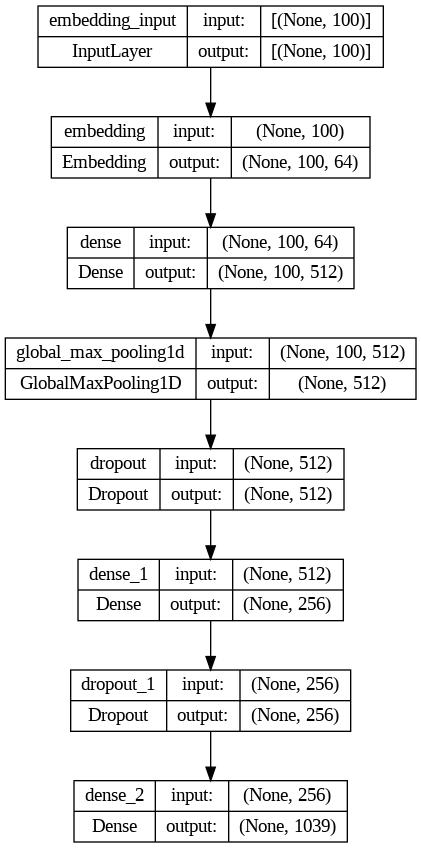

In [10]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture and show shapes
plot_model(model_classification, show_shapes=True)



This code tests the output of the get_model_prediction function with a specific input text, "aopwdkawkdopdaodwkdospdl[pawldldppalp," which is intentionally not present in the dataset. If the model does not find any relevant predictions, it prints "Data not found".

In [11]:
def get_model_prediction(input_text, top_k=30, threshold=0.003):
    # Tokenization and text padding
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Predict categories
    prediction = model_classification.predict(input_pad)[0]

    # Gets the index of the top k predicted labels
    top_k_indices = prediction.argsort()[-top_k:][::-1]

    # Get top k predicted labels and their probabilities
    top_k_labels = [label_encoder.classes_[i] for i in top_k_indices]
    top_k_probabilities = prediction[top_k_indices]

    # Check if the top predicted probability is below the threshold
    if top_k_probabilities[0] < threshold:
        top_k_labels = ["Not Found"]
        top_k_probabilities = [1.0]  # Assign a probability of 1.0 for "Not Found"

    return top_k_labels, top_k_probabilities

# Example of use for testing models
input_text_to_test = "aopwdkawkdopdaodwkdospdl[pawldldppalp"
top_k_labels, top_k_probabilities = get_model_prediction(input_text_to_test, top_k=30)

# Add error handling for "Not Found"
if top_k_labels[0] == "Not Found":
    print("Data not found.")
else:
    print(f"Input Text: {input_text_to_test}")
    print("Top Predicted Labels:")
    for label, prob in zip(top_k_labels, top_k_probabilities):
        print(f"{label}: {prob:.4f}")


1/1 [==============================] - 0s 124ms/step
Data not found.



This code is designed to correct and predict job positions even in the presence of typos. For example, when given the input text "That 3D Aawdwartist," which contains a typo ("Aawdwartist" instead of "Artist"), it successfully corrects the input and outputs the top predicted job positions, such as "That 3D Artist."

In [32]:
def get_model_prediction(input_text, top_k=3, threshold=0.03):
    # Tokenization and text padding
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Predict categories
    prediction = model_classification.predict(input_pad)[0]

    # Gets the index of the top k predicted labels
    top_k_indices = prediction.argsort()[-top_k:][::-1]

    # Get top k predicted labels and their probabilities
    top_k_labels = [label_encoder.classes_[i] for i in top_k_indices]
    top_k_probabilities = prediction[top_k_indices]

    # Check if the top predicted probability is below the threshold
    if top_k_probabilities[0] < threshold:
        top_k_labels = []  # Empty array if "Not Found"
    else:
        # After ensuring the results are valid, filter those that have a probability below the threshold
        top_k_labels = [label for label, prob in zip(top_k_labels, top_k_probabilities) if prob >= threshold]

    return top_k_labels

# Set a threshold value
threshold = 0.03

# Example of use for testing models (Fixing Typo)
input_text_to_test = "That 3D Aawdwartist"
top_k_labels = get_model_prediction(input_text_to_test, top_k=3, threshold=threshold)

# Add error handling to not print if no labels are found
if not top_k_labels:
    print("Data not found.")
else:
    print(f"Input Text: {input_text_to_test}")
    print("Top Predicted Labels:")

    # Displays job positions along with their array
    print("Job Positions Array:", top_k_labels)


1/1 [==============================] - 0s 29ms/step
Input Text: That 3D Aawdwartist
Top Predicted Labels:
Job Positions Array: ['That 3D Artist']


The provided code defines a function, get_model_predictions, to retrieve predicted labels and their probabilities for a given input text. In the example usage with the text "Intern Business Consulting (Sustainability Reporting)," it successfully outputs the predicted labels and their probabilities, indicating a probability of 1 for the specified input in the dataset.

In [33]:
def get_model_predictions(input_text, threshold=0.03):
    # Tokenization and text padding
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Predict categories
    prediction = model_classification.predict(input_pad)[0]

    # Get labels and their probabilities that pass the threshold
    labels_and_probabilities = [(label_encoder.classes_[i], prob) for i, prob in enumerate(prediction) if prob >= threshold]

    # Sort labels based on probabilities in descending order
    sorted_labels_and_probabilities = sorted(labels_and_probabilities, key=lambda x: x[1], reverse=True)

    # Extract labels and probabilities
    labels = [label for label, prob in sorted_labels_and_probabilities]
    probabilities = [prob for label, prob in sorted_labels_and_probabilities]

    return labels, probabilities

# Set a threshold value
threshold = 0.03

# Example of use for testing models
input_text_to_test = "Intern Business Consulting (Sustainability Reporting)"
predicted_labels, predicted_probabilities = get_model_predictions(input_text_to_test, threshold=threshold)

# Add error handling to not print if no labels are found
if not predicted_labels:
    print("Data not found.")
else:
    print(f"Input Text: {input_text_to_test}")
    print("Predicted Labels:")
    for label, prob in zip(predicted_labels, predicted_probabilities):
        print(f"{label}: {prob}")


1/1 [==============================] - 0s 21ms/step
Input Text: Intern Business Consulting (Sustainability Reporting)
Predicted Labels:
Intern Business Consulting (Sustainability Reporting): 1.0


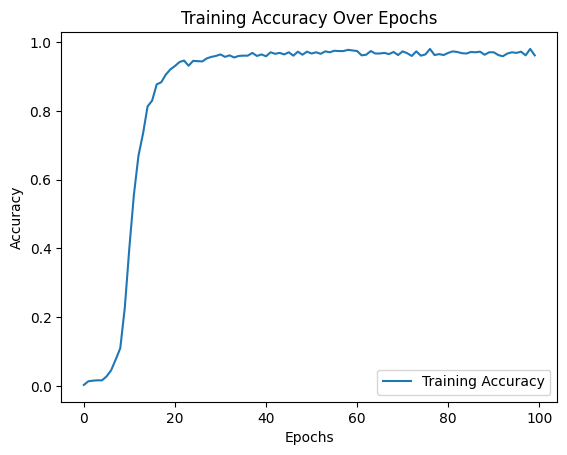

In [34]:
# Plot training accuracy
plt.plot(history_classification.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Save the model in SavedModel format
saved_model_path = "/content/gdrive/MyDrive/Capstone/saved_model_new"
model_classification.save(saved_model_path)

# Convert SavedModel model to tflite format
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

# Save tflite model to file
tflite_model_path = "/content/gdrive/MyDrive/Capstone/model_classification_new.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)


In [ ]:
# Save the model to a file
model_classification.save('classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
